In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
data = pd.read_csv("../data/sensordata.csv", sep=";", usecols=['Time.Date', 'Acc.Abs'])
data 

,Time.Date,Acc.Abs
0,210800.0,10.15695
1,210810.0,9.99079
2,210820.0,10.35707
3,210830.0,10.12535
4,210840.0,9.45583
...,...,...
9455,305350.0,8.11224
9456,305360.0,8.17075
9457,305370.0,8.18790
9458,305380.0,8.19446


In [3]:
def convert_to_float(x):
    try:
        return float(x.decode().replace(',', '.'))
    except ValueError:
        return value  # Return the value unchanged if conversion fails

In [4]:
#data = np.genfromtxt("../data/sensordata.csv", delimiter=";", dtype=np.float64, usecols=(0,-1), names=True, converters={'AccAbs': convert_to_float})
#data = np.array([list(row) for row in data])
#data = data.astype(float)
data = np.genfromtxt("../data/sensordata.csv", delimiter=";", dtype=np.float64, usecols=(0,-1))
data = data[1:]
mean_value = np.mean(data[:,1])
data[:,1] = data[:,1] - mean_value

In [5]:
def plot(t, y_mes, y_pred, name): 
    plt.figure(figsize=(12, 3))
    plt.title(name)
    
    plt.plot(t, y_mes, 'b-', label="Measured")
    plt.plot(t, y_pred, 'r-', label="Predicted")
    plt.title(name)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

    plt.legend()
    plt.show()

In [6]:
def sinf(t, A, f, phi, D):
    return A * np.sin(2 * np.pi * f * t + phi) + D

t = data.T[0][0:1000]
y_mes = data.T[1][0:1000]
    
# Generate y values by applying the function to the x values
y_pred = sinf(t, -0.076502986, 12.123477, 28.568548, 0.01854068)

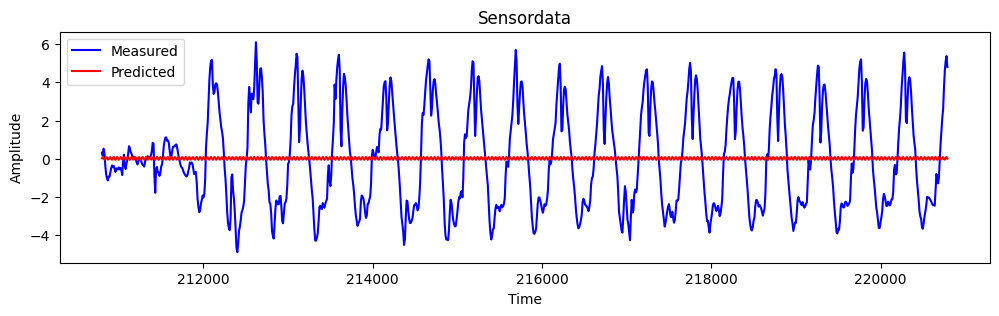

In [7]:
plot(t, y_mes, y_pred, 'Sensordata')

# Not working as intended

In [8]:
#data = data[1500:1700][1:]
#data = data[~np.isnan(data).any(axis=1) & ~np.isinf(data).any(axis=1)]
data = data[0:1000]

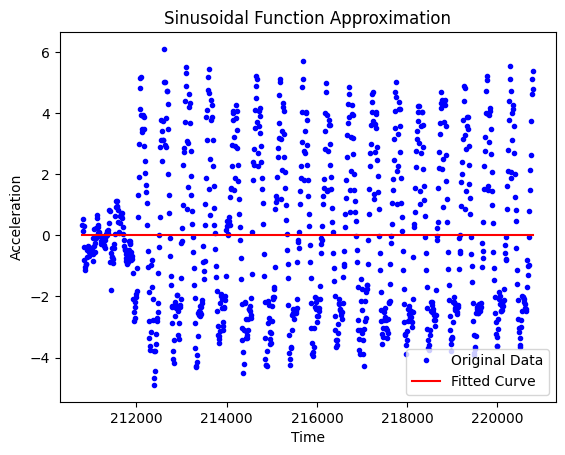

In [9]:
# Define a sinusoidal function
def sinusoidal_function(t, A, f, phi, D):
    return A * np.sin(2 * np.pi * f * t + phi) + D

# Initial guess for the parameters
initial_guess = (1.0, 1.0, 0.0, 0.0)

# Fit the sinusoidal function to the data
params, _ = curve_fit(sinusoidal_function, data[:, 0], data[:, 1], p0=initial_guess)

# Extract the optimized parameters
A_opt, f_opt, phi_opt, D_opt = params

# Generate the fitted curve
t_values = np.linspace(min(data[:, 0]), max(data[:, 0]), len(data[:,0]))
fitted_curve = sinusoidal_function(t_values, A_opt, f_opt, phi_opt, D_opt)

# Plot the original data and the fitted curve
plt.plot(data[:, 0], data[:, 1], 'b.', label='Original Data')
plt.plot(t_values, fitted_curve, 'r-', label='Fitted Curve')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.legend()
plt.title('Sinusoidal Function Approximation')
plt.show()